In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix, accuracy_score, precision_score

In [63]:
df = pd.read_csv('/content/drive/MyDrive/loan_approval_dataset.csv')
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [64]:
len(df[df[' loan_status'] == ' Approved'])

2656

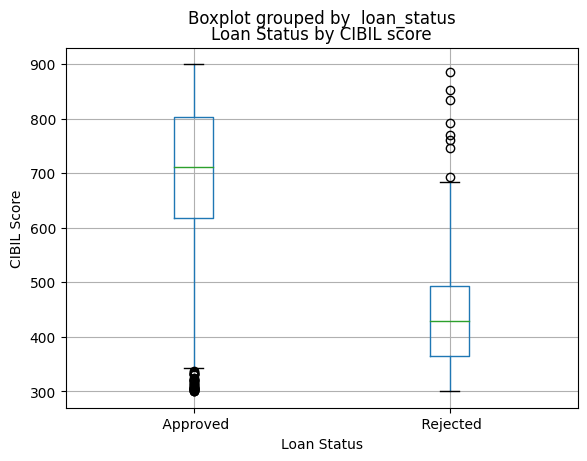

In [65]:
boxplot = df.boxplot(column=' cibil_score', by=' loan_status')
plt.xlabel('Loan Status')
plt.ylabel('CIBIL Score')
plt.title('Loan Status by CIBIL score')
plt.show()

Text(0, 0.5, 'Approved Loans')

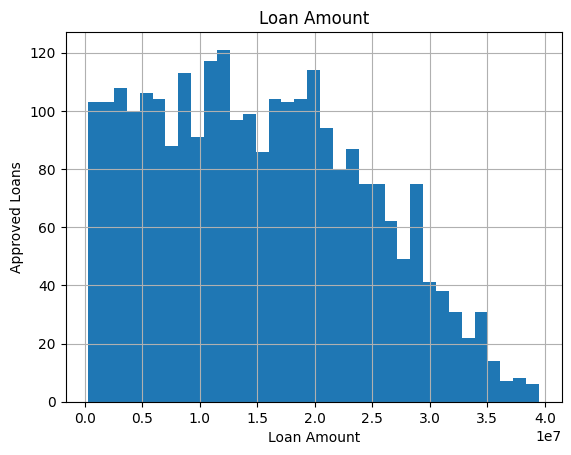

In [66]:
histogram_df = df[[' loan_amount', ' loan_status']][df[' loan_status'] == ' Approved']
histogram_df.hist(column=' loan_amount', bins=35)
plt.title('Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Approved Loans')

In [67]:
df.isna().sum().sort_values()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [68]:
df[' education'].unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [69]:
df[' self_employed'].unique()

array([' No', ' Yes'], dtype=object)

In [70]:
df[' education'] = df[' education'].map(lambda x: 1 if x == ' Graduate' else 0)
df[' self_employed'] = df[' self_employed'].map(lambda x: 1 if x == ' Yes' else 0)
df[' loan_status'] = df[' loan_status'].map(lambda x: 1 if x == ' Approved' else 0)

In [71]:
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1,1,1000000,2300000,12,317,2800000,500000,3300000,800000,0
4265,4266,0,0,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1
4266,4267,2,0,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0
4267,4268,1,0,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,1


In [72]:
X = df[[' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value']]
y = df[[' loan_status']]

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=21, stratify=y)

In [75]:
columns = X_train.columns
columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value'],
      dtype='object')

In [76]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#The scaler returns a np array, so we have to convert it back to a df.
X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)

In [77]:
X_train

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,0.880549,-1.014836,0.997994,0.961649,0.466828,0.528198,0.808500,-0.862911,0.934504,0.561471,-0.183298
1,-0.294041,0.985381,-1.002010,-1.058982,-0.947715,1.579902,-0.115930,-0.572316,-0.185121,-0.980141,-0.890516
2,0.293254,-1.014836,0.997994,-0.243639,0.115934,1.579902,-0.226397,-0.312309,0.706009,-0.350468,-0.306292
3,-1.468630,-1.014836,0.997994,-0.952633,-0.673579,-0.523505,-1.348504,-0.817028,-1.076250,-1.045279,-0.521532
4,0.293254,-1.014836,-1.002010,0.890750,1.245374,-1.224641,0.517799,-0.342898,-0.984852,0.984871,1.108143
...,...,...,...,...,...,...,...,...,...,...,...
2983,-0.881335,-1.014836,-1.002010,0.465354,-0.125306,1.579902,-0.272909,0.635951,-0.093723,0.518045,-0.429287
2984,1.467844,0.985381,-1.002010,-1.484378,-1.419229,0.878766,-0.319421,-1.138212,-1.076250,-1.360115,-1.290247
2985,0.293254,-1.014836,0.997994,0.465354,0.905446,0.177630,0.488729,1.477149,1.231547,1.093435,0.739160
2986,0.880549,0.985381,0.997994,1.457945,0.368139,-1.575209,1.680604,2.960716,-0.162271,1.961949,1.446378


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

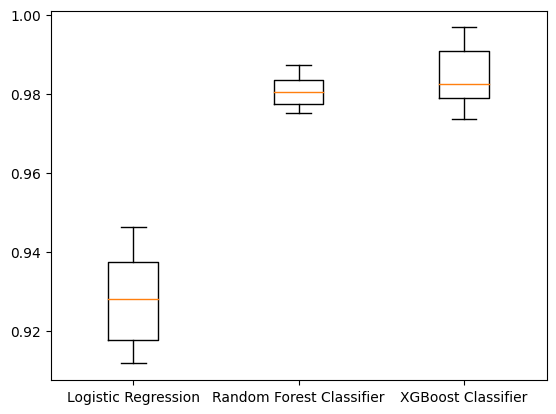

In [80]:
models = {"Logistic Regression": LogisticRegression(), "Random Forest Classifier": RandomForestClassifier(), "XGBoost Classifier": GradientBoostingClassifier()}
results = []

for model in models.values():

  kf = KFold(n_splits=6, random_state=42, shuffle=True)
  cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring="precision")
  results.append(cv_scores)

plt.boxplot(results, labels=models.keys())
plt.show()

In [ ]:
model = GradientBoostingClassifier()

In [ ]:
params = {
    'loss' : ['log_loss','deviance','exponential'],
    'learning_rate': [0.01,0.05,0.1,0.5,1,5,10,50,100],
    'n_estimators' : [25,50,75,100,150,200,300],
    'subsample' : [0.75,0.8,0.85,0.9,0.95,1],
    'min_samples_split' : [5,7,10,12,15,20,25,50,75],
    'min_samples_leaf' : [1,3,5,8,10,12,15,20,25,30],
    'max_features' : ['sqrt','log2'],
    'max_depth': [4,5,6,7,8,9,10] #consideramos valores más chicos que para Random Forest
}
rs = RandomizedSearchCV(estimator=model, param_distributions=params, cv=5, n_iter=200, scoring='roc_auc', random_state=7)
rs.fit(X_train, y_train)

In [82]:
rs.best_params_

{'subsample': 0.9,
 'n_estimators': 100,
 'min_samples_split': 15,
 'min_samples_leaf': 20,
 'max_features': 'sqrt',
 'max_depth': 10,
 'loss': 'log_loss',
 'learning_rate': 0.05}

In [83]:
rs.best_score_

0.9979419026478851

In [84]:
model = rs.best_estimator_
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(learning_rate=0.05, max_depth=10,
                           max_features='sqrt', min_samples_leaf=20,
                           min_samples_split=15, subsample=0.9)

In [89]:
roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

0.998823065835727

In [90]:
y_pred = model.predict(X_test)
y_test = y_test.astype(int)
accuracy_score(y_test, y_pred)

0.9797033567525371

In [91]:
confusion_matrix(y_test, y_pred)

array([[472,  12],
       [ 14, 783]])